# K-means

In [52]:
# necessary imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Generate data

In [53]:
# Generate Data
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
              (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
              (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

### Main functions

In [54]:
def initialize_centroids(points, k):
    '''
        Selects k random points as initial
        points from dataset
    '''
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [55]:
def closest_centroid(points, centroids):
    '''
        Returns an array containing the index to the nearest centroid for each point
    '''
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [56]:
def move_centroids(points, closest, centroids):
    '''
        Returns the new centroids assigned from the points closest to them
    '''
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])
    

In [79]:
def log_msg(centroids, num_iterations):
    print(
        'Iteration {1}\nСoordinates of centroids: \n{0}'.format(
            centroids, num_iterations
        )
    )

In [91]:
def print_plot(points, centroids, plot_num):
    plt.subplot(plot_num)
    plt.scatter(points[:, 0], points[:, 1], c='coral')
    y = range(len(centroids))
    plt.scatter(centroids[:, 0], centroids[:, 1], c=y, s=100)
    ax = plt.gca()

In [92]:
def main(points):
    num_iterations = 0
    k = 4
        
    # Initialize centroids
    centroids = initialize_centroids(points, k)
    log_msg(centroids, num_iterations)
    print_plot(points, centroids, "121")
    # Run iterative process
    while True:
        closest = closest_centroid(points, centroids)
        centroids_new = move_centroids(points, closest, centroids)
        if np.array_equal(centroids_new, centroids):
            log_msg(centroids, num_iterations)
            print_plot(points, centroids,"122")
            return centroids
        centroids = centroids_new
        num_iterations += 1

Iteration 0
Сoordinates of centroids: 
[[ 0.26522615 -0.20957976]
 [ 0.51923224  0.05961294]
 [ 0.26274478 -0.54440975]
 [-0.73669469  0.84635657]]
Iteration 15
Сoordinates of centroids: 
[[-0.07626551 -0.61857614]
 [ 1.24577778  0.80073578]
 [ 1.4028899  -0.50526767]
 [-0.56142125  0.38177477]]


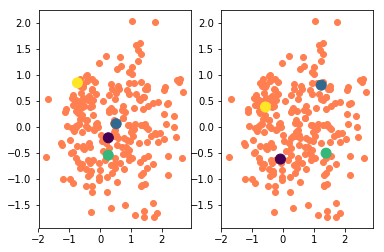

In [93]:
centroids = main(points)